# Example of Bivector Projective Method in Action.
George Bird 02.06.2025

Following the publication of the spotlight resonance method paper into the ICLR Re-Align workshop, a secondary method was developed which is equivilant to the spotlight width becoming infinitesimal. In such a case the activations are projected onto each bivector plane, and then the ensemble is displayed as a single plane. 

This enables the developer to see the 'raw' activations within the privilidged planes to determine, by eye, if they align or form more complicated patterns. A value of epsilon is still used such that only activations close in angle to the plane are projected into it.

In [1]:
from PrivilegedPlaneProjectiveMethod import *
import matplotlib.pyplot as plt

Below I'm going to make some fake data, which would ordinarily be a set of activations from a neural network layer.

In [2]:
SAMPLES = 5000
DIMENSIONALITY_OF_LAYER = 8

# This distribution of activations is isotropic, since it is produced from a random multivariate standard normal distribution
isotropic_set_of_activations = np.random.randn(SAMPLES, DIMENSIONALITY_OF_LAYER)

In this example, I'm going to assume the privileged basis is aligned to the standard basis - this may not be generally the case and will have to be deduced from functional forms or empirically.

In [3]:
privileged_basis = np.eye(DIMENSIONALITY_OF_LAYER)

Further parameters:

In [4]:
# Epsilon parameter from SRM, basically how large the spotlight cone is.
epsilon = 0.75

Using permutation spotlight resonance:

In [5]:
in_plane_activations = PrivilegedPlaneProjectiveMethod(
    latent_layer_activations = isotropic_set_of_activations,
    privileged_basis = privileged_basis,
    epsilon = epsilon,
    perm_or_comb = "PERM",
    verbose=True,
)

Calculating Bivectors... Done!
Calculating plane 1 of 56.
Calculating plane 2 of 56.
Calculating plane 3 of 56.
Calculating plane 4 of 56.
Calculating plane 5 of 56.
Calculating plane 6 of 56.
Calculating plane 7 of 56.
Calculating plane 8 of 56.
Calculating plane 9 of 56.
Calculating plane 10 of 56.
Calculating plane 11 of 56.
Calculating plane 12 of 56.
Calculating plane 13 of 56.
Calculating plane 14 of 56.
Calculating plane 15 of 56.
Calculating plane 16 of 56.
Calculating plane 17 of 56.
Calculating plane 18 of 56.
Calculating plane 19 of 56.
Calculating plane 20 of 56.
Calculating plane 21 of 56.
Calculating plane 22 of 56.
Calculating plane 23 of 56.
Calculating plane 24 of 56.
Calculating plane 25 of 56.
Calculating plane 26 of 56.
Calculating plane 27 of 56.
Calculating plane 28 of 56.
Calculating plane 29 of 56.
Calculating plane 30 of 56.
Calculating plane 31 of 56.
Calculating plane 32 of 56.
Calculating plane 33 of 56.
Calculating plane 34 of 56.
Calculating plane 35 of 56

Produce an ensemble plot:

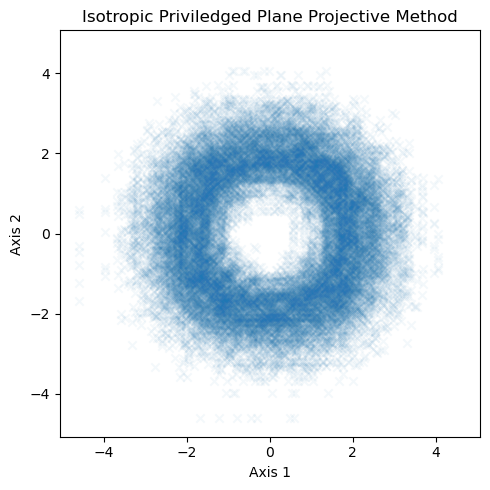

In [6]:
fig, ax = plt.subplots(1, figsize=(5, 5))
ax.scatter(in_plane_activations[:, 0], in_plane_activations[:, 1], alpha=0.05, marker="x")

maximum = np.max(np.abs(in_plane_activations))
ax.set_xlim(-1.1*maximum, 1.1*maximum)
ax.set_ylim(-1.1*maximum, 1.1*maximum)

ax.set_title("Isotropic Priviledged Plane Projective Method")
ax.set_xlabel("Axis 1")
ax.set_ylabel("Axis 2")
plt.tight_layout()
plt.show()

In [7]:
def gaussian(X, Y, mean, spread):
    exponent = -(np.square(X-mean[0])+np.square(Y-mean[1]))/(2*spread*spread)
    return np.exp(exponent)

0.0 2.9664286848596144


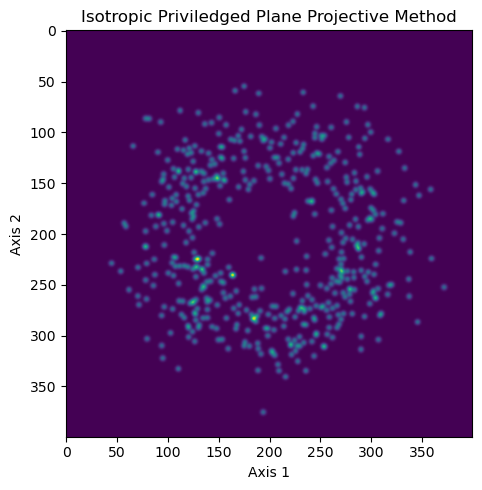

In [8]:
RESOLUTION = 400
maximum = np.max(np.abs(in_plane_activations))
X = np.linspace(-maximum, maximum, RESOLUTION)
Y = np.linspace(-maximum, maximum, RESOLUTION)
X, Y = np.meshgrid(X, Y)
spread = 0.2/maximum


heat_map = np.zeros_like(X)
for i in range(min([500, in_plane_activations.shape[0]])):
    heat_map += gaussian(X, Y, in_plane_activations[i, :], spread)


fig, ax = plt.subplots(1, figsize=(5, 5))
print(np.min(heat_map), np.max(heat_map))
ax.imshow(heat_map/np.max(heat_map))
ax.set_title("Isotropic Priviledged Plane Projective Method")
ax.set_xlabel("Axis 1")
ax.set_ylabel("Axis 2")
plt.tight_layout()
plt.show()

### Introducing Anisotropy
This is achieved through altering the distribution of activations provided to SRM. This may naturally arise in a neural network.

In [9]:
# This is simply achieved using a standard activation function (this is considered trivial anisotropy in the paper)
anisotropic_set_of_activations = np.tanh(isotropic_set_of_activations)

# or relu
# anisotropic_set_of_activations = np.maximum(isotropic_set_of_activations, isotropic_set_of_activations*0.0)

In [10]:
in_plane_activations = PrivilegedPlaneProjectiveMethod(
    latent_layer_activations = anisotropic_set_of_activations,
    privileged_basis = privileged_basis,
    epsilon = epsilon,
    perm_or_comb = "PERM",
    verbose=True,
)

Calculating Bivectors... Done!
Calculating plane 1 of 56.
Calculating plane 2 of 56.
Calculating plane 3 of 56.
Calculating plane 4 of 56.
Calculating plane 5 of 56.
Calculating plane 6 of 56.
Calculating plane 7 of 56.
Calculating plane 8 of 56.
Calculating plane 9 of 56.
Calculating plane 10 of 56.
Calculating plane 11 of 56.
Calculating plane 12 of 56.
Calculating plane 13 of 56.
Calculating plane 14 of 56.
Calculating plane 15 of 56.
Calculating plane 16 of 56.
Calculating plane 17 of 56.
Calculating plane 18 of 56.
Calculating plane 19 of 56.
Calculating plane 20 of 56.
Calculating plane 21 of 56.
Calculating plane 22 of 56.
Calculating plane 23 of 56.
Calculating plane 24 of 56.
Calculating plane 25 of 56.
Calculating plane 26 of 56.
Calculating plane 27 of 56.
Calculating plane 28 of 56.
Calculating plane 29 of 56.
Calculating plane 30 of 56.
Calculating plane 31 of 56.
Calculating plane 32 of 56.
Calculating plane 33 of 56.
Calculating plane 34 of 56.
Calculating plane 35 of 56

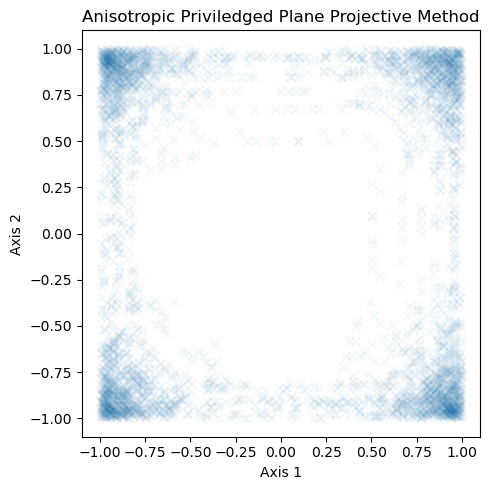

In [11]:
fig, ax = plt.subplots(1, figsize=(5, 5))
ax.scatter(in_plane_activations[:, 0], in_plane_activations[:, 1], alpha=0.05, marker="x")

maximum = np.max(np.abs(in_plane_activations))
ax.set_xlim(-1.1*maximum, 1.1*maximum)
ax.set_ylim(-1.1*maximum, 1.1*maximum)

ax.set_title("Anisotropic Priviledged Plane Projective Method")
ax.set_xlabel("Axis 1")
ax.set_ylabel("Axis 2")
plt.tight_layout()
plt.show()

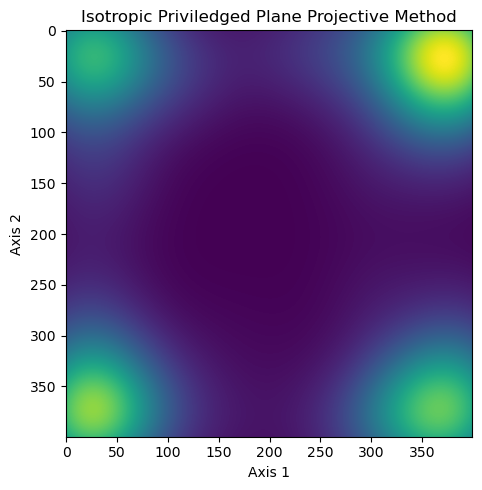

In [ ]:
RESOLUTION = 400
maximum = np.max(np.abs(in_plane_activations))
X = np.linspace(-maximum, maximum, RESOLUTION)
Y = np.linspace(-maximum, maximum, RESOLUTION)
X, Y = np.meshgrid(X, Y)
spread = 0.2/maximum


heat_map = np.zeros_like(X)
for i in range(min([500, in_plane_activations.shape[0]])):
    heat_map += gaussian(X, Y, in_plane_activations[i, :], spread)


fig, ax = plt.subplots(1, figsize=(5, 5))
ax.imshow(heat_map/np.max(heat_map))
ax.set_title("Anisotropic Priviledged Plane Projective Method")
ax.set_xlabel("Axis 1")
ax.set_ylabel("Axis 2")
plt.tight_layout()
plt.show()